<a href="https://colab.research.google.com/github/gmanojkumar402-max/Manoj-colab-notebooks/blob/main/Ridge_regression_with_CV_and_smooth_visualization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

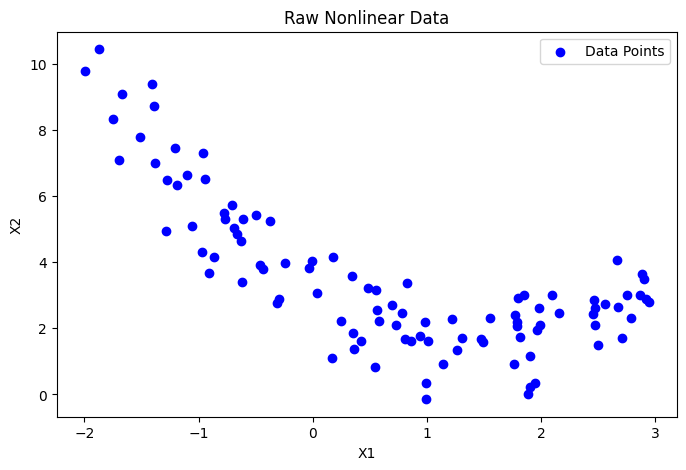

Best Hyperparameters: {'poly__degree': 2, 'ridge__alpha': 0.01}
Best MSE: 0.8290094604990559


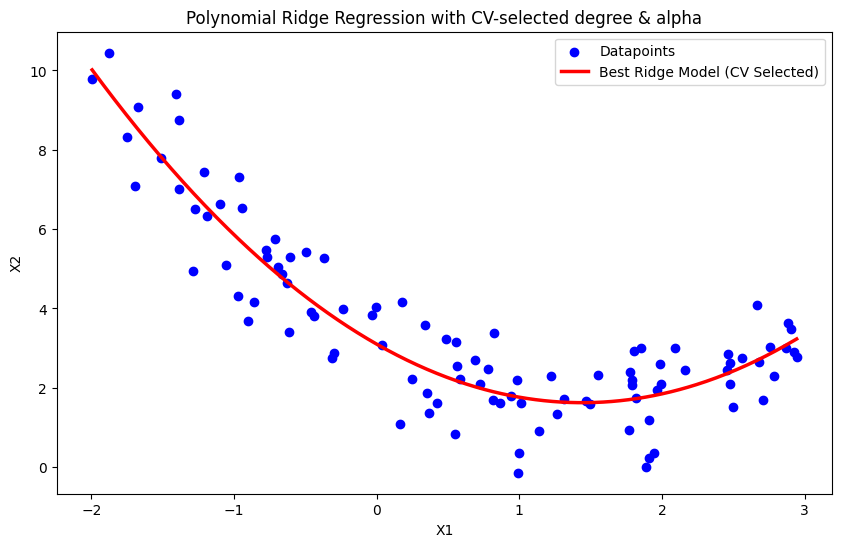

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


# 1. Generate nonlinear training data

m = 100
X1 = 5 * np.random.rand(m, 1) - 2
X2 = 0.7 * X1**2 - 2 * X1 + 3 + np.random.randn(m, 1)

plt.figure(figsize=(8, 5))
plt.scatter(X1, X2, c='blue', label="Data Points")
plt.title("Raw Nonlinear Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


# 2. Build Pipeline (Poly → Ridge)

pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),  # no constant 1 column
    ('ridge', Ridge())
])


# 3. Set up hyperparameter grid for CV

param_grid = {
    'poly__degree': [2, 4, 6, 8, 12, 16],   # try different polynomial degrees
    'ridge__alpha': [0.01, 0.1, 1, 10, 100, 300]  # L2 strengths
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross validation
    scoring='neg_mean_squared_error',
    n_jobs=-1               # use all CPU cores
)


# 4. Fit using cross-validation

grid.fit(X1, X2.ravel())

print("Best Hyperparameters:", grid.best_params_)
print("Best MSE:", -grid.best_score_)

best_model = grid.best_estimator_


# 5. Create a smooth range of X values for plotting

xx = np.linspace(X1.min(), X1.max(), 500).reshape(-1, 1)

yy = best_model.predict(xx)


# 6. Plot the fitted model vs actual data

plt.figure(figsize=(10, 6))
plt.scatter(X1, X2, c='blue', label="Datapoints")
plt.plot(xx, yy, 'r', linewidth=2.5, label="Best Ridge Model (CV Selected)")
plt.title("Polynomial Ridge Regression with CV-selected degree & alpha")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()
